In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transform
from matplotlib import pyplot
import numpy as np
import cv2
import scipy.io as sci
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling2D, Conv2D, MaxPool1D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [3]:
test_images.shape

(10000, 32, 32, 3)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=30,batch_size=64, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
782/782 [==============================] - 277s 351ms/step - loss: 1.8977 - accuracy: 0.3645 - val_loss: 1.1974 - val_accuracy: 0.5612
Epoch 2/30
782/782 [==============================] - 288s 368ms/step - loss: 1.1154 - accuracy: 0.6020 - val_loss: 0.8834 - val_accuracy: 0.6831
Epoch 3/30
782/782 [==============================] - 289s 369ms/step - loss: 0.9167 - accuracy: 0.6757 - val_loss: 0.7354 - val_accuracy: 0.7420
Epoch 4/30
782/782 [==============================] - 290s 371ms/step - loss: 0.7940 - accuracy: 0.7181 - val_loss: 0.6967 - val_accuracy: 0.7592
Epoch 5/30
782/782 [==============================] - 290s 371ms/step - loss: 0.7132 - accuracy: 0.7529 - val_loss: 0.6291 - val_accuracy: 0.7813
Epoch 6/30
782/782 [==============================] - 291s 372ms/step - loss: 0.6496 - accuracy: 0.7722 - val_loss: 0.6252 - val_accuracy: 0.7834
Epoch 7/30
782/782 [==============================] - 292s 373ms/step - loss: 0.6135 - accuracy: 0.7886 - val_loss: 0.5605 -

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 13s 43ms/step - loss: 0.4337 - accuracy: 0.8600


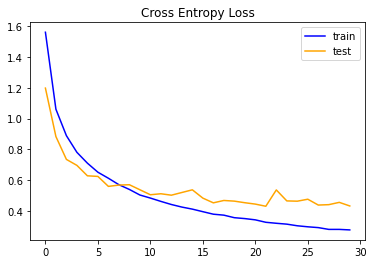

<Figure size 720x720 with 0 Axes>

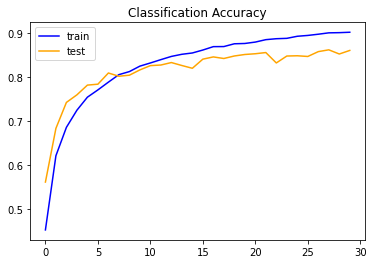

<Figure size 720x720 with 0 Axes>

In [9]:
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()
g = plt.figure()
g.set_figwidth(10)
g.set_figheight(10)
pyplot.show()
# plot accuracy
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
# save plot to file
pyplot.show()
pyplot.close()